**AVANCE**

* 1.
  - a 15 puntos [x]
  - b 15 puntos [x]
  - c 15 puntos [x]
  - d 15 puntos [x]
  - e 15 puntos [x]


* 2.
Completado [x]
 
* 3.
Completado [x]

# **Funciones**
---

In [1]:
# librerias
from math import sqrt
from math import pow
from math import e
import numpy as np
import matplotlib.pyplot as plt

# **1**
---
1. Encuentre la solución optima al siguiente problema

$$ max f(x) = \frac{0.5}{\sqrt{1+x{^2}}} - \sqrt{1+x{^2}} \ast \left(1 - \frac{0.5}{1+x{^2}} \right) + x$$

> Recordemos que en este caso buscamos el mínimo, por lo que es de mencionar que: 
$$
min f(x) \equiv max (-(f(x))
$$


In [63]:
evalF = 0
evalF1 = 0
def f(x:float) -> float:
  global evalF
  evalF += 1
  #if x <= 0: 
    #return (10000)
  #0.5/√(1+x^2) - √(1+x^2)*(1-(0.5/(1+x^2)))+x
  return -((0.5/sqrt(1+x**2)) - sqrt(1+x**2)*(1-(0.5/(1+x**2)))+x)  


def df(x:float) -> float:
  global evalF1
  evalF1 += 1
  #((x^2 + 1)^(3/2) - x^3 - 2x ) / (x^2 + 1)^(3/2)
  numerador = pow(((x**2) + 1), 3/2) - x**3 - 2*x
  denominador = pow(((x**2)+1), 3/2)
  return -(numerador/denominador)

def df2(x:float) -> float:
  #(x(^2) - 2) / (x^(2)+1)^(5/2)
  numerador = (x**2) - 2
  denominador = pow((x**2 + 1), 5/2)
  return -(numerador/denominador)

def dfd(x, delta):
    numerador = f(x+delta) - f(x-delta)
    denominador =  2*delta
    
    return (numerador/denominador)

def df2d(x, delta):
    numerador = f(x+delta) - (2*f(x)) + f(x-delta)
    denominador = delta**2
    
    return (numerador/denominador)

## 1 a) **Estimaciones cuadráticas sucesivas**
---
Utilizando el método de **Estimaciones Cuadráticas sucesivas**. 
La entrada será:
$$
  x_{0} = 0;  \vartriangle = 0.1; \epsilon_{1} = 0.0001
$$
Debe reportar el valor obtenido para $x^{*}$, $f(x{^2})$ y el número de evaluaciones de $f(x)$ que realizo el programa.

In [73]:
def get_as(x1, x2, x3, f1, f2, f3): 
    #f1, f2, f3 = f(x1), f(x2), f(x3)
    a0 = f1
    a1 = (f2-f1)/(x2-x1)
    a2 = (1/(x3-x2)) * ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1))
    return (a0, a1, a2)

def x_opt(x1, x2, a1, a2):
    return (x1+x2)/2 - a1/(2*a2)
    
        
def est_squared(x1, delta, epsilon):
    """
    x1 = float, punto inicial
    delta = float, incremento
    epsilon = float, tolerancia
    """

    x2 = x1 + delta
    fx1 = f(x1)
    fx2 = f(x2)
    if fx1>fx2:
        x3 = x1 + 2*delta
    else: 
        x3 = x1 - delta
    
    # etiquetar tal que x1 < x2 < x3
    tmp = list((x1,x2,x3))
    tmp = sorted(tmp)
    x1 = tmp[0]; x2 = tmp[1]; x3 = tmp[2]

    f1, f2, f3 = f(x1), f(x2), f(x3)
    
    a0, a1, a2 = get_as(x1, x2, x3, f1, f2, f3)
    xb = x_opt(x1, x2, a1, a2)
    #f_b = f(xb)
    x_min = x1
    #f_min = f(x1)
    
    while True:
        #print(xb, f_b)
        
        ############ calcular xb usando x1, x2 y x3
        a0, a1, a2 = get_as(x1, x2, x3, f1, f2, f3)
        xb = x_opt(x1, x2, a1, a2)    
        f_b = f(xb)
       

        ######## Almacenar los tres mejores puntos y etiquetarlos
        # tal que: x1 < x2 < x3
       
        tmp2 = [[x1, f1], [x2, f2], [x3, f3], [xb, f_b]]
        tmp2 = sorted(tmp2, key=lambda x: x[1])
        
        
        x1 = tmp2[0][0]; x2 = tmp2[1][0]; x3 = tmp2[2][0]
        # guardar fs
        f1 = tmp2[0][1]; f2 = tmp2[1][1]; f3 = tmp2[2][1]
        
        # constrain
        if abs(xb-x_min)<epsilon:
            break
            #return (x_min, f(x_min))
        
            
        # Determinar fmin y xmin 
        x_min = x1
        
    
    p1 = "{0:.3f}".format(xb)
    p2 = "{0:.3f}".format(f_b)
    return (f"({p1}, {p2})\n{evalF-2}")

In [74]:
x0, delta, eps = 0, 0.1, 0.0001
x0 = float(x0)
delt = float(delta)
eps = float(eps)
print(est_squared(x0, delt, eps))
# Para que no haya problema con los contadores globales 
# a la hora de correr otras funciones que hagan uso del
# mismo contador global
# reiniciamos
global evalF 
evalF = 0

(0.786, -0.300)
12


## 1 b) **Newton - Raphson**
---
Utilizando el método de Newton - Raphson. La entrada a su programa
será: 
$$
x_{0} = 0; \epsilon_{1} = 0.0001
$$
Debera reportar el valor obtenido para $x{^*}$, $f(x{^*})$ y el número de evaluaciones de $f^{'}(x)$ que realizo el programa. Ademas debe incluir en su reporte el cálculo de la primer y segunda derivada. 


In [64]:
def newton_rapshon(x1, epsilon):
    """
    x1 = float, punto inicial 
    epsilon = float, tolerancia
    """
    k = 0
    X = [x1]
    
    #while True:
    while abs(df(X[k])) > epsilon:
        tmp = X[k]-(df(X[k]) / df2(X[k]))
        #print(tmp, f(tmp))
        
        X.append(tmp)
        k = k+1
       
     
    p1 = "{0:.3f}".format(X[k])
    p2 = "{0:.3f}".format(f(X[k]))
    return (f"({p1},{p2})\n{int(evalF1/2)}")

In [65]:
x0, eps = 0, 0.0001
x0 = float(x0)
eps = float(eps)

print(newton_rapshon(x0, eps))
# Para que no haya problema con los contadores globales 
# a la hora de correr otras funciones que hagan uso del
# mismo contador global
# reiniciamos
global evalF1 
evalF1 = 0

(0.786,-0.300)
5


## 1 c) **Cuasi Newton**
---
Utilizando el método de Cuasi Newton. 
La entrada a su programa será: 
$$
x_{0} = 0; \epsilon_{1} = 0.0001; \vartriangle = 0.01
$$
Debe reportar el valor obtenido para $x{^*}$, $f{^*}$ y el número 
de evaluaciones de $f(x)$ que realizo el programa



In [66]:
def cuasi_newton(x0, epsilon, delta):
    """
    x0 = float, punto inicial
    delta = float, incremento
    epsilon = float, tolerancia
    """
    k = 0
    X = [x0]
    
    #while True:
    #con = 0
    while abs(dfd(X[k], delta)) > epsilon:
        tmp = X[k]-(dfd(X[k], delta) / df2d(X[k], delta))
        #print(tmp, f(tmp))
        #break
        X.append(tmp)
        k = k+1
        
     
    p1 = "{0:.3f}".format(X[k])
    p2 = "{0:.3f}".format(f(X[k]))
    evalf = (3*k + 3)
    #print(evalf)
    #int(evalF/2)-1
    return (f"({p1},{p2})\n{evalf}")



In [67]:
x0, eps, delta = 0, 0.0001, 0.01
x0 = float(x0)
eps = float(eps)
delta = float(delta)
print(cuasi_newton(x0, eps, delta))

(0.786,-0.300)
18


## 1 d) **Bisección**
---
Utilizando el método de bisección. La entrada a su pograma será: 
$$
a = 0; b = 5; \epsilon_{1} = 0.0001 
$$
Debe reportar el valor obtenido para $x^{*}$, $f(x{^*})$ y el número de 
evaluaciones de $f^{'}(x)$ que realizo el programa. 


In [68]:
def bisecciones(a,b,eps):
    """ 
    a y b = float, puntos
    eps = float, tolerancia
    """
    z = (a+b)/2
    while abs(df(z)) > eps:
        #print(z, f(z))
        if df(z) < 0: 
            a = z
        else: 
            b = z
            
        z = (a+b)/2
        
    p1 = "{0:.3f}".format(z)
    p2 = "{0:.3f}".format(f(z))
    return (f"({p1},{p2})\n{int((evalF1+3)/2)}")


In [69]:
a,b,eps = 0, 5, 0.0001
a = float(a)
b = float(b)
eps = float(eps)
print(df(a), df(b))
if df(a) <= 0 and df(b) >= 0:
  print(bisecciones(a,b,eps))
  global evalF1 
  evalF1 = 0
else:
  print("Error")

-1.0 0.018295317063647898
(0.786,-0.300)
13


## 1 e) **Secante**
---
Utilizando el método de la secante. La entrada a su programa será: 
$$
a = 0; b = 5; \epsilon_{1} = 0.0001
$$
Debe reportar el valor obtenido para $x^{*}$, $f(x{^*})$ y el número de 
evaluaciones de $f^{'}(x)$ que realizo el programa. 

In [70]:
def secante(x_L, x_R, eps): 
    """
    xL, xR = float, puntos
    eps = float, tolerancia
    """
    dfR = df(x_R)
    dfL = df(x_L)
    
    if (dfL*dfR) >= 0:
        return("Error")
    
    z = x_R - ((dfR*(x_R - x_L)) / (dfR-dfL))
    dfZ = df(z)
    while abs(dfZ) > eps:
      
        if dfZ < 0: 
            x_L = z
            dfL = dfZ
            
        else: 
            x_R = z
            dfR = dfZ
            
        
        z = x_R - ( (dfR*(x_R - x_L)) / (dfR-dfL))
        dfZ = df(z)        
        
    p1 = "{0:.3f}".format(z)
    p2 = "{0:.3f}".format(f(z))
    return (f"({p1},{p2})\n{evalF}")


In [72]:
xL, xR, eps = 0, 5, 0.0001
xL = float(xL)
xR = float(xR)
eps = float(eps)
print(secante(xL, xR, eps))
global evalF
evalF = 0

(0.786,-0.300)
1


# 2. 
---
Gráfique la función $f(x)$, en el intervalo $[x{^*}-1, x{^*}+1]$

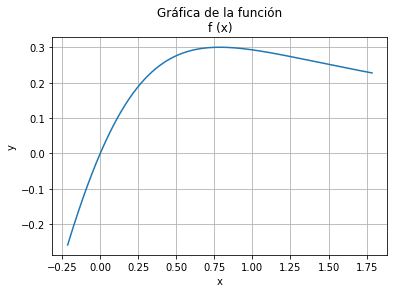

In [ ]:
# tomamos los intervalos que nos regresaron los métodos previamente 
#x_start = np.arange(0.300, 0.786, 0.0001) 
x_start = np.arange((0.786-1), (0.786+1), 0.0001) 

y = [f(i) for i in x_start]
#print(x_start, y)
plt.plot(x_start,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Gráfica de la función\nf (x)')
plt.show()

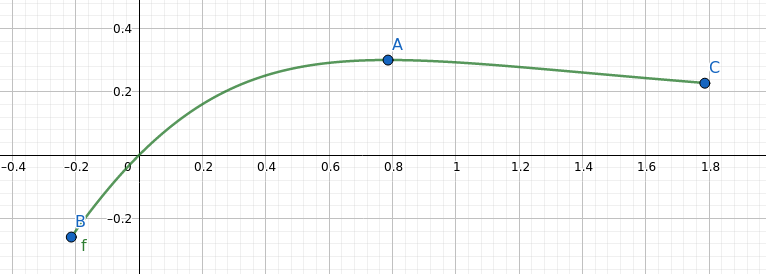

# 3.
---
Utilice el método de su preferencia para resolver el siguiente problema: 
$$
min g(x) = e{^x} - x{^3}
$$
Indique los parámetros de entrada que utilizó y grafique la función 
$g(x)$ en un intervalo que contenga a la solución óptima


In [79]:
# Función
def g(x):
  return ((e**x) - (x**3))

Gráficamos la función para observar su comportamiento

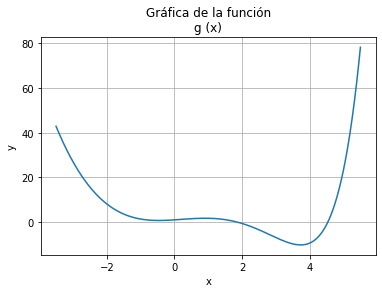

In [80]:
# Graficamos para ver cómo se comporta la grááfica
x = np.arange(-3.5, 5.5, 0.0001) 

y = [g(i) for i in x]
#print(x_start, y)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Gráfica de la función\ng (x)')
plt.show()

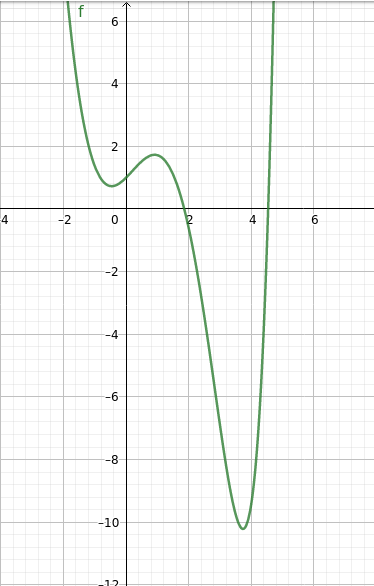

Observamos que nuestro míínimo global se encuentra en el intervalo [2, 4]
> Haremos uso del método de newton-rhapson para encontrar el optimo 

> Recordemos que en este caso buscamos el mínimo, por lo que es de mencionar que: 
$$
min f(x) \equiv max (-(f(x))
$$

Pero no importa mucho dado que todos estos métodos son de minimización


In [81]:
evalF2 = 0
def dg(x:float) -> float:
  global evalF2
  evalF2 += 1
  
  # e^x - 3x^2
  return ((e**x)-3*(x**2))
  
def dg2(x:float) -> float:
  # e^x - 6x
  return ((e**x)-6*x)
  
def newton_rapshonG(x1, epsilon):
    """
    x1 = float, punto inicial 
    epsilon = float, tolerancia
    """
    k = 0
    X = [x1]
    
    #while True:
    while abs(dg(X[k])) > epsilon:
        tmp = X[k]-(dg(X[k]) / dg2(X[k]))
        #print(tmp, f(tmp))
        
        X.append(tmp)
        k = k+1
       
     
    p1 = "{0:.3f}".format(X[k])
    p2 = "{0:.3f}".format(g(X[k]))
    
    return (f"({p1},{p2})\n{int(evalF2/2)}")

In [82]:
x0, eps = 3, 0.001
x0 = float(x0)
eps = float(eps)

print(newton_rapshonG(x0, eps))
# Para que no haya problema con los contadores globales 
# a la hora de correr otras funciones que hagan uso del
# mismo contador global
# reiniciamos
global evalF2 
evalF2 = 0

(3.733,-10.216)
8


El punto inicial que le pasemos importa para encontrar nuestro mínimo global, si le pasamos un punto menor a 2.9, obtendremos un mínimo local.
Pero si pasamos un punto mayor o igual a 2.9, obtendremos el mínimo global

Graficamos el intervalo dónde se tiene la solución óptima 


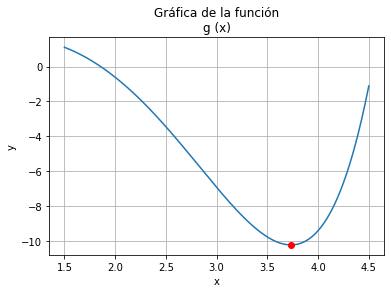

In [83]:
x = np.arange(1.5, 4.5, 0.0001) 

y = [g(i) for i in x]
#print(x_start, y)
plt.plot(x,y, 3.733, -10.216, "ro")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Gráfica de la función\ng (x)')
plt.show()